Classification 思路  
1. 引入資料集  
2. 找出資料特徵 & 關聯係數
3. 將資料分組 (實驗組 & 對照組)  
4. 做成決策樹 & 訓練模型
5. 繪出決策樹
6. 帶入對照組資料，預測
7. 正確率 (accuracy_score)
8. 剖析正確率 (混淆矩陣)

In [3]:
from sklearn.datasets import load_wine
import pandas as pd


wine = load_wine()
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"] = wine["target"]
# 資料 & 答案 df

x = pd.DataFrame(wine["data"], columns=wine["feature_names"])
# 資料 df
y = wine["target"]
# 答案 df

<Axes: >

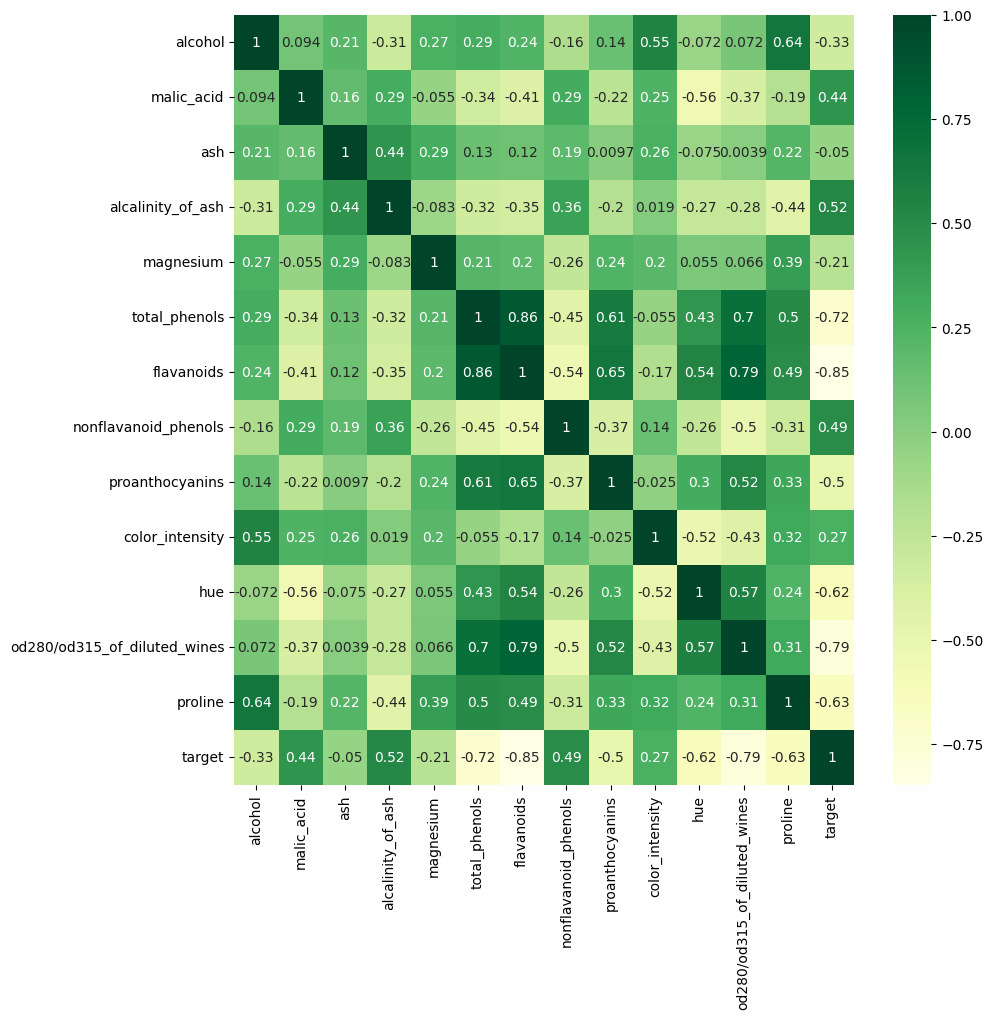

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.astype("float").corr()
# df 功能 / astype 轉換浮點數 / corr 相關係數

plt.figure(figsize=(10,10))
sns.heatmap(df.astype("float").corr(), annot=True, cmap="YlGn")

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np


xarray = np.array(x)
yarray = np.array(y)
# 轉array

x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)
# 資料分組

In [6]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=3)
# 做成決策樹

clf.fit(x_train, y_train)
# 訓練模型

DecisionTreeClassifier(max_depth=3)

[Text(0.4444444444444444, 0.875, 'color_intensity <= 3.825\ngini = 0.658\nsamples = 160\nvalue = [51, 65, 44]\nclass = class_1'),
 Text(0.2222222222222222, 0.625, 'proline <= 790.0\ngini = 0.098\nsamples = 58\nvalue = [3, 55, 0]\nclass = class_1'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 51\nvalue = [0, 51, 0]\nclass = class_1'),
 Text(0.3333333333333333, 0.375, 'alcohol <= 13.02\ngini = 0.49\nsamples = 7\nvalue = [3, 4, 0]\nclass = class_1'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = class_1'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = class_0'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.49\ngini = 0.583\nsamples = 102\nvalue = [48, 10, 44]\nclass = class_0'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]\nclass = class_2'),
 Text(0.7777777777777778, 0.375, 'proline <= 724.5\ngini = 0.285\nsamples = 58\nvalue = [48, 10, 0]\nclass = class_0'),

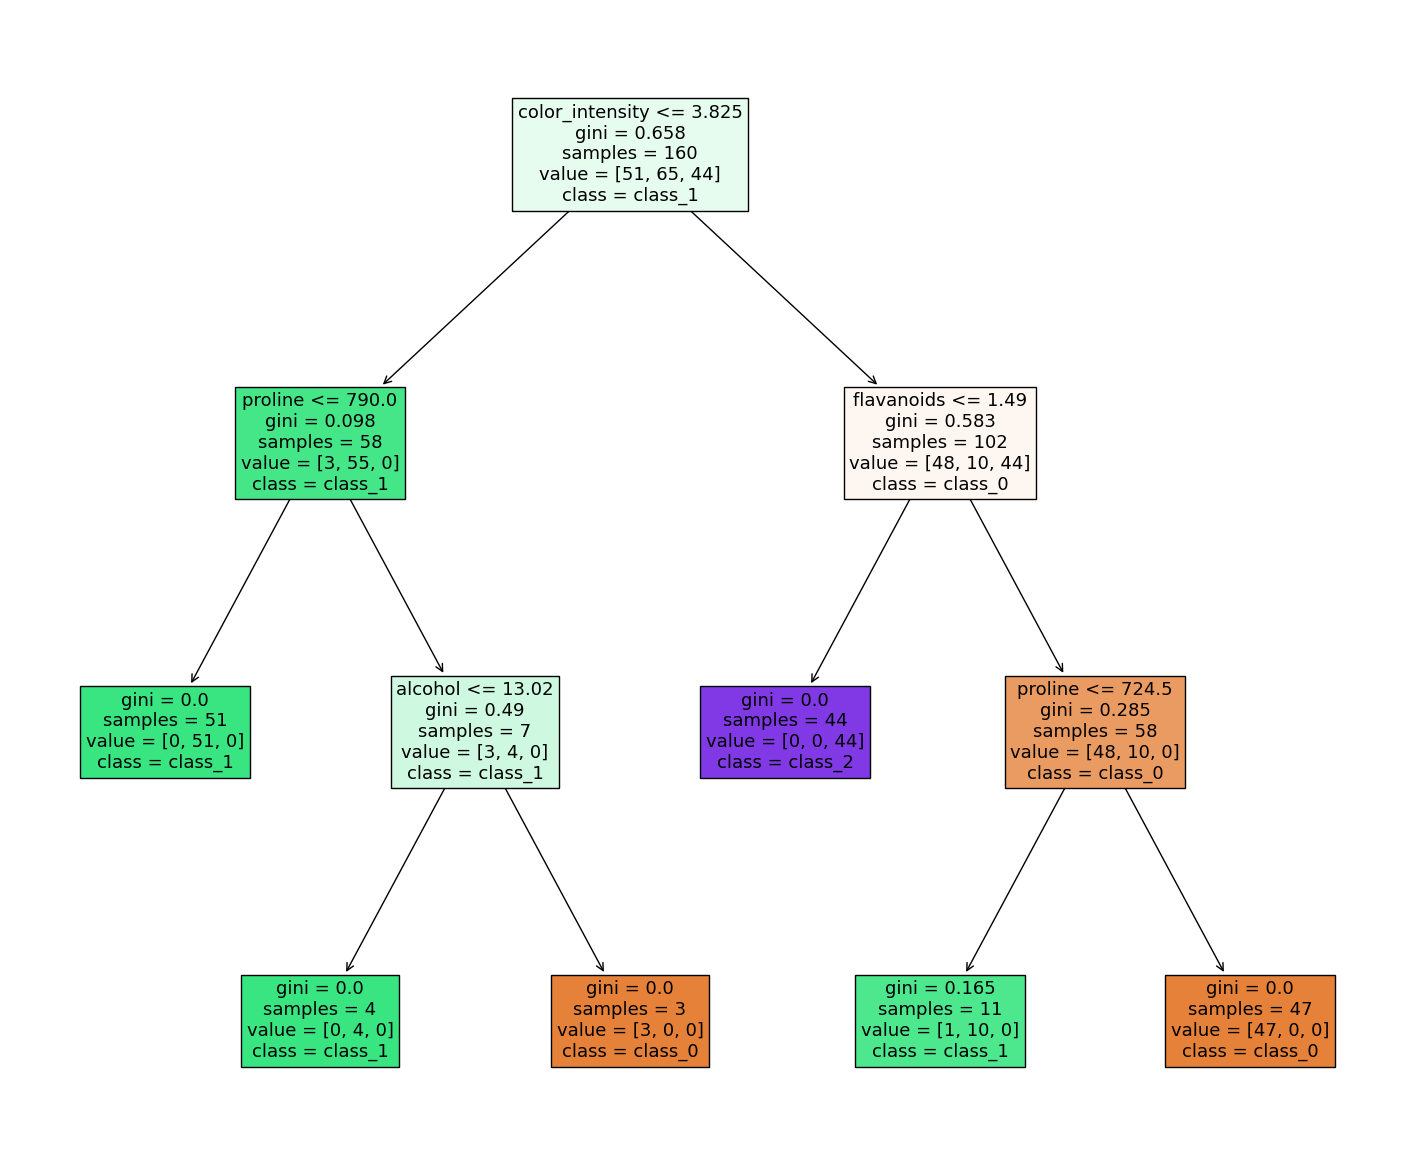

In [7]:
from sklearn.tree import plot_tree


plt.figure(figsize=(18,15))
plot_tree(clf, feature_names=wine["feature_names"], class_names=wine["target_names"], filled=True, fontsize=13)

In [8]:
pre = clf.predict(x_test)

print(list(pre))
print(list(y_test))


[0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2]
[0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2]


In [9]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, pre)

0.8888888888888888

In [10]:
from sklearn.metrics import confusion_matrix


con = confusion_matrix(y_test, pre)
pd.DataFrame(con)

,0,1,2
0,8,0,0
1,0,5,1
2,0,1,3


Cluster 思路  
1. 引入資料集 & 整理資料
2. 將資料分組 (實驗組 & 對照組)  
3. 尋找K值 -> 畫分群圖 (K means)
4. 可畫圖找K值
5. 計算K值的正確率 (silhouette_score)

In [11]:
from sklearn.datasets import load_wine
import pandas as pd


wine = load_wine()
# 引入資料

df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"] = wine["target"]
# 資料 & 答案 df

x = pd.DataFrame(wine["data"], columns=wine["feature_names"])
y = wine["target"]

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np


xarray = np.array(x)
yarray = np.array(y)
# 轉換array

x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)
# 分資料

In [13]:
from sklearn.cluster import KMeans


clu = KMeans(n_clusters=3)
# 自己假設分三群

clu.fit(x_train)
# 帶入訓練資料

clu.labels_
# 貼標籤

from sklearn.metrics import silhouette_score
# 計算正確率

silhouette_score(x_train, clu.labels_)
# 計算正確率


c:\Users\李重誼\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5683251121290729

In [14]:
# 正常情況下 不知道K值

list_for_k = []
list_for_score = []

for k in range(2,6):
    clu = KMeans(n_clusters=k, n_init="auto")
    clu.fit(xarray)

    s = silhouette_score(xarray, clu.labels_)

    list_for_k.append(k)
    list_for_score.append(s)

print("k值:", list_for_k)
print("正確率:", list_for_score)

k值: [2, 3, 4, 5]
正確率: [0.655521358978658, 0.5711381937868838, 0.560594106006062, 0.5640175937193859]


In [15]:
# 透過上方得知k為2時，分數最高
clu = KMeans(n_clusters=2)
clu.fit(x_train)
clu.labels_


預測: [1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1]
正確: [1 0 1 2 2 0 2 1 1 1 0 1 1 1 0 2 2 2]


c:\Users\李重誼\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster  
1. 資料中並沒有答案
2. 所以計算出最適合的KMeans時，我們可以自己對labels分出來的資料命名 clusterA, clusterB ...
3. 所以沒有正確答案與否的問題
4. silhouette_score 也並非正確率分數 而是各個資料相聚程度的分數

In [18]:
for how_many_cluster in range(2,21):
    clu = KMeans(n_clusters=how_many_cluster, n_init="auto")
    clu.fit(x_train)
    gather_score = silhouette_score(x_train, clu.labels_)
    print(f"分成 {how_many_cluster} 群時，資料聚合分數為:{gather_score}")


分成 2 群時，資料聚合分數為:0.6473020460511115
分成 3 群時，資料聚合分數為:0.5683251121290729
分成 4 群時，資料聚合分數為:0.5655387974306487
分成 5 群時，資料聚合分數為:0.5576155855666831
分成 6 群時，資料聚合分數為:0.5773016898879597
分成 7 群時，資料聚合分數為:0.5682170702231879
分成 8 群時，資料聚合分數為:0.5649304809988565
分成 9 群時，資料聚合分數為:0.49863426615877654
分成 10 群時，資料聚合分數為:0.5359160198158243
分成 11 群時，資料聚合分數為:0.5155322572372125
分成 12 群時，資料聚合分數為:0.47911692987260424
分成 13 群時，資料聚合分數為:0.4757186890529799
分成 14 群時，資料聚合分數為:0.5119784886536485
分成 15 群時，資料聚合分數為:0.4860997632657922
分成 16 群時，資料聚合分數為:0.47574687091549217
分成 17 群時，資料聚合分數為:0.4536031449873802
分成 18 群時，資料聚合分數為:0.4431361663860448
分成 19 群時，資料聚合分數為:0.4496219439481319
分成 20 群時，資料聚合分數為:0.4501228987452442
